In [119]:
import numpy as np

# 随机数据数量
num_of_data = 20000
# 生成数据
np.random.seed(0)
x_value = np.random.rand(num_of_data, 4)
y_value = 4 * x_value[:, 0] + 2 * x_value[:, 1] - x_value[:, 2] + 0.5 * x_value[:, 3] + np.random.randn(
    num_of_data)  # 增加随机噪声

In [120]:
x_value

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
       [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492],
       ...,
       [0.01392644, 0.63438904, 0.76533136, 0.36888892],
       [0.42546666, 0.67785646, 0.18979169, 0.1384451 ],
       [0.84515277, 0.78412312, 0.61925482, 0.15752893]])

In [121]:
y_value

array([2.82906167, 2.11699815, 5.10275747, ..., 0.77025723, 1.44271824,
       5.26389377])

In [122]:
# 初始化参数
w = np.zeros(4)
b = 0
w, b

(array([0., 0., 0., 0.]), 0)

损失函数:
$$\begin{aligned}
\min_{\mathbf{w}, b} \quad & \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)^2 \\
\text{subject to} \quad & \mathbf{w} \in \mathbb{R}^d, b \in \mathbb{R}
\end{aligned}$$

In [123]:
# 定义损失函数
def mse_loss(x, y, w_i, b_i):
    n = len(y)
    y_pred = x.dot(w_i) + b_i
    loss = (1 / n) * np.sum(0.5 * (y_pred - y) ** 2)
    return loss

梯度下降的基本公式为：$\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_{\mathbf{w}} L(\mathbf{w})$
其中：
- $\mathbf{w}$ 是模型参数。
- $\eta$ 是学习率（控制每次更新的步长）。
- $\nabla_{\mathbf{w}} L(\mathbf{w})$ 是损失函数 $L(\mathbf{w})$ 对参数 $\mathbf{w}$ 的梯度。 

已知损失函数为均方误差（Mean Squared Error, MSE）:
$$MSE=L(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)^2$$

**计算$\mathbf{w}$中每个元素的偏导数**:
$$\frac{\partial L}{\partial w_i} = \frac{1}{n} \sum_{i=1}^n \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right) x_i^{(i)}$$
- 其中$i$ 表示样本的索引，$\mathbf{x}$ 是特征向量, $\mathbf{w}$是权重向量, $b$是偏置项。

推导过程为:
1. 损失函数的展开  
   首先将损失函数对每个权重 $w_j$ 的偏导数进行展开：
    $$\frac{\partial \text{MSE}}{\partial w_j} = \frac{\partial}{\partial w_j} \left( \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)^2 \right)$$

2. 上面的函数可以视为两个函数的结合:
    - 内层函数为 $\mathbf{w}^\top \mathbf{x}^{(i)} + b$ (模型输出); 
    - 外层函数为 $\frac{1}{2} \left(z - y^{(i)}\right)^2$，其中 $z = \mathbf{w}^\top \mathbf{x}^{(i)} + b$ (均方误差)

3. 应用链式法则, 计算内层函数的导数
    - 计算内层函数的导数: 对于每个 $w_j$，内层函数 $\mathbf{w}^\top \mathbf{x}^{(i)}$ 的偏导数是 $x_j^{(i)}$: 
      $\frac{\partial}{\partial w_j} (\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}) = \frac{\partial}{\partial w_j} \left( \sum_{k=1}^d w_k x_k^{(i)} + b - y^{(i)} \right) = x_j^{(i)}$
    - 这里的 $j$ 是特定的权重索引, $k$指的是遍历索引, $i$是需要求导的权重索引。
    - 当我们对整个表达式 $\mathbf{w}^\top \mathbf{x}^{(i)}$ 求关于 $w_j$ 的偏导数时，我们关注的是如何通过改变 $w_j$ 来影响整个表达式的值。由于每个 $w_k$ 乘以相应的 $x_k^{(i)}$，只有当 $k = j$ 时，改变 $w_j$ 才会直接影响到乘积 $w_j x_j^{(i)}$，因此这部分的导数是 $x_j^{(i)}$, 这是因为这里的 $x_j^{(i)}$ 被视为相对于 $w_j$ 的常数，因为我们在计算关于 $w_j$ 的偏导数时，$x_j^{(i)}$ 是固定不变的。
    - 在偏导数的计算中，所有不是关于我们正在求导的变量（这里是 $w_j$）的量都可以视为常数。
  
4. 应用链式法则, 计算外层函数的导数
    - 对于 $z$ 的函数 $f(z) = \frac{1}{2} (z - y^{(i)})^2$，对 $z$ 求导：$\frac{\partial f}{\partial z} = z - y^{(i)}=\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}$

5. 应用链式法则, 合并两部分
    - 将外层函数的导数乘以内层函数关于 $w_j$ 的导数，得到损失函数关于 $w_j$ 的总导数：
  $$\frac{\partial \text{MSE}}{\partial w_j} = \frac{1}{n} \sum_{i=1}^n \left( (\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}) \cdot x_j^{(i)} \right)$$    

**计算偏置 \(b\) 的偏导数**:
我们的损失函数是均方误差（MSE）:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)^2
$$

对于偏置 $b$ 的偏导数，我们应用相同的链式法则：

1. 外层函数是关于预测误差的平方：$f(z) = \frac{1}{2} (z - y^{(i)})^2$
   其中内层函数为: $z = \mathbf{w}^\top \mathbf{x}^{(i)} + b$。

2. 对外层函数 $f(z)$ 求导，我们得到：$\frac{\partial f}{\partial z} = z - y^{(i)}$

3. 内层函数对于 $b$ 来说，是 $z = \mathbf{w}^\top \mathbf{x}^{(i)} + b$，而 $b$ 是直接加在 $\mathbf{w}^\top \mathbf{x}^{(i)}$ 上的，所以它的导数相对于 $b$ 是 1。

4. 应用链式法则：
   $$
   \frac{\partial \text{MSE}}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)})
   $$

这个偏导数表明，调整偏置 $b$ 如何影响整体损失。每一次梯度下降步骤中，我们根据此偏导数更新 $b$，以期减少整体损失。具体的更新规则是：
$$
b \leftarrow b - \eta \frac{\partial \text{MSE}}{\partial b}
$$
其中 $\eta$ 是学习率，它控制了更新步长的大小。

这样，通过同时更新权重 $\mathbf{w}$ 和偏置 $b$，我们能够更全面地调整模型以最小化损失函数，从而提高模型对数据的拟合度。

In [124]:
# 定义梯度计算函数
def gradients(x, y, w_i, b_i):
    n = len(y)
    y_pred = x.dot(w_i) + b_i
    dw = (1 / n) * np.dot(x.T, (y_pred - y))  # 梯度
    db = (1 / n) * np.sum(y_pred - y)  # 梯度
    return dw, db

In [125]:
d_w, d_b = gradients(x_value, y_value, w, b)
d_w

array([-1.70736802, -1.54456595, -1.2822062 , -1.41103647])

In [126]:
d_b

-2.7504536003686773

In [127]:
# 设置学习率和迭代次数
learning_rate = 0.1
iterations = 1000

# 进行梯度下降
for i in range(iterations):
    dw, db = gradients(x_value, y_value, w, b)
    w -= learning_rate * dw
    b -= learning_rate * db
    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {mse_loss(x_value, y_value, w, b)}")

Iteration 0: Loss = 3.688248575998514
Iteration 100: Loss = 0.6355031075555717
Iteration 200: Loss = 0.5321794484505348
Iteration 300: Loss = 0.5084987059168831
Iteration 400: Loss = 0.5021203225540083
Iteration 500: Loss = 0.5000637035648583
Iteration 600: Loss = 0.4992979849226871
Iteration 700: Loss = 0.4989869272694415
Iteration 800: Loss = 0.4988548748117241
Iteration 900: Loss = 0.4987976714940119


In [128]:
w

array([ 3.98665824,  1.9900824 , -1.01578144,  0.46801986])

In [129]:
b

0.037753076864165916

In [130]:
mse_loss(x_value, y_value, w, b)

0.4987728335697942

In [131]:
# 使用 np.linalg.lstsq() 函数进行线性回归
x_value_one = np.c_[x_value, np.ones(num_of_data)]  # 添加偏置项
w_np, _, _, _ = np.linalg.lstsq(x_value_one, y_value, rcond=None)
w_np

array([ 3.99804328,  2.00071544, -1.0056135 ,  0.4788141 ,  0.01539845])

In [132]:
# 计算损失
mse_loss(x_value_one, y_value, w_np, 0)

0.4987531038135738

在计算中, 我们可以不单独计算偏置b的偏导数; 而是在自变量矩阵$\mathbf{X}$中加入一个全是1的列, 对应的将需要求的$b$放到$\mathbf{w}$中进行求解; 

步骤解释
1. 修改特征矩阵：给定原始的特征矩阵 $\mathbf{X}$（维度为 $n \times d$，其中 $n$ 是样本数量，$d$ 是特征数量），我们在 $\mathbf{X}$ 的右侧添加一列全为 1 的向量。新的特征矩阵 $\mathbf{X}'$ 将有维度 $n \times (d+1)$。

2. 调整权重向量：原来的权重向量 $\mathbf{w}$（维度为 $d \times 1$）扩展为 $\mathbf{w}'$（维度为 $(d+1) \times 1$），其中新增的元素对应于偏置 $b$。

3. 模型表示：在这种情况下，模型可以表示为：$\mathbf{y} = \mathbf{X}' \mathbf{w}'$, 
这里，$\mathbf{X}'$ 的每行最后一个元素是 1，相当于每次计算模型输出时自动加上偏置 $b$。
   
4. 在这种表示下，梯度的计算涵盖了所有参数，包括原来的权重和偏置，因此不需要单独为偏置计算梯度。损失函数的梯度将针对扩展后的权重向量 $\mathbf{w}'$ 进行计算，这样每次更新都会同时更新所有权重和偏置。

优点
- 简化计算：这种方法简化了模型的参数更新过程，因为所有参数都被视为权重，可以使用统一的方式处理。
- 代码实现效率：在实现时，只需处理一个权重向量，不需要编写额外的代码来特别处理偏置项。

In [133]:
w = np.zeros(5)
w

array([0., 0., 0., 0., 0.])

In [134]:
x_value_one = np.c_[x_value, np.ones(num_of_data)]  # 添加偏置项
x_value_one

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 1.        ],
       [0.4236548 , 0.64589411, 0.43758721, 0.891773  , 1.        ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492, 1.        ],
       ...,
       [0.01392644, 0.63438904, 0.76533136, 0.36888892, 1.        ],
       [0.42546666, 0.67785646, 0.18979169, 0.1384451 , 1.        ],
       [0.84515277, 0.78412312, 0.61925482, 0.15752893, 1.        ]])

In [135]:
# 定义损失函数
def mse_loss(x, y, w_i):
    n = len(y)
    y_pred = x.dot(w_i)
    loss = (1 / n) * np.sum(0.5 * (y_pred - y) ** 2)
    return loss

In [136]:
# 定义梯度计算函数
def gradients(x, y, w_i):
    n = len(y)
    y_pred = x.dot(w_i)
    the_dw = (1 / n) * np.dot(x.T, (y_pred - y))  # 梯度
    return the_dw

In [137]:
# 设置学习率和迭代次数
learning_rate = 0.1
iterations = 1000

# 进行梯度下降
for i in range(iterations):
    dw = gradients(x_value_one, y_value, w)
    w -= learning_rate * dw
    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {mse_loss(x_value_one, y_value, w)}")

Iteration 0: Loss = 3.688248575998515
Iteration 100: Loss = 0.6355031075555716
Iteration 200: Loss = 0.5321794484505348
Iteration 300: Loss = 0.5084987059168831
Iteration 400: Loss = 0.5021203225540083
Iteration 500: Loss = 0.5000637035648583
Iteration 600: Loss = 0.4992979849226871
Iteration 700: Loss = 0.4989869272694415
Iteration 800: Loss = 0.4988548748117241
Iteration 900: Loss = 0.4987976714940119


In [138]:
w

array([ 3.98665824,  1.9900824 , -1.01578144,  0.46801986,  0.03775308])

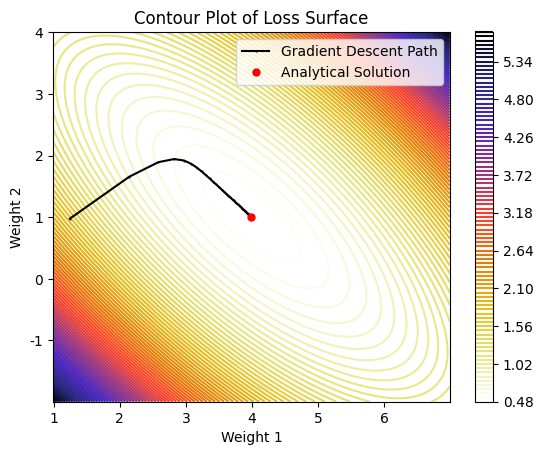

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# 随机数据数量
num_of_data = 20000
# 设置随机种子
np.random.seed(0)

# 生成数据
x_value = np.random.rand(num_of_data, 2)
y_value = 4 * x_value[:, 0] + 1 * x_value[:, 1] + np.random.randn(num_of_data)  # 增加随机噪声

# 初始化权重
w = np.random.randn(2)  # 包括了对应于偏置项的权重

# 设置初始学习率
initial_learning_rate = 0.1

# 总迭代次数
iterations = 10000


# 定义损失函数
def mse_loss(x, y, w_i):
    n = len(y)
    y_pred = x.dot(w_i)
    loss = (1 / n) * np.sum(0.5 * (y_pred - y) ** 2)
    return loss


# 定义梯度计算函数
def gradients(x, y, w_i):
    n = len(y)
    y_pred = x.dot(w_i)
    the_dw = (1 / n) * np.dot(x.T, (y_pred - y))  # 梯度
    return the_dw


# 迭代次数
iterations = 1000
# 设置初始学习率
initial_learning_rate = 0.99
learning_rate = initial_learning_rate
# 设置最小学习率
min_learning_rate = 0.01
# 衰减率
decay_rate = 0.5
weight_history = [] # 保存权重历史

# 进行梯度下降
for i in range(iterations):
    # 计算当前学习率
    learning_rate = max(min_learning_rate, learning_rate - (initial_learning_rate - min_learning_rate) / iterations)
    dw = gradients(x_value, y_value, w)
    w -= learning_rate * dw
    weight_history.append(w.copy())

'''用 np.linalg 计算线性回归的解析解'''
w_np, _, _, _ = np.linalg.lstsq(x_value, y_value, rcond=None)

'''生成损失曲面等高线2D'''
w1 = np.linspace(w_np[0] - 3, w_np[0] + 3, 100)
w2 = np.linspace(w_np[1] - 3, w_np[1] + 3, 100)
w1, w2 = np.meshgrid(w1, w2)
losses = np.zeros_like(w1)

# 计算网格上每点的损失
for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
        weight = np.array([w1[i, j], w2[i, j]])
        losses[i, j] = mse_loss(x_value, y_value, weight)

# 绘制等高线图
fig, ax = plt.subplots()
CS = ax.contour(w1, w2, losses, 100, cmap='CMRmap_r')  # 生成100层等高线
plt.colorbar(CS)

# 绘制梯度下降路径
path = np.array(weight_history)
ax.plot(path[:, 0], path[:, 1], label='Gradient Descent Path', color='black', marker='.', linestyle='-', markersize=1)

# 标记解析解位置
ax.plot([w_np[0]], [w_np[1]], 'ro', markersize=5, label='Analytical Solution')

# 设置图例和标签
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_title('Contour Plot of Loss Surface')
ax.legend()

plt.show()

In [140]:
weight_history[-1]

array([3.9914596 , 1.00504097])

In [141]:
w_np

array([3.9914596 , 1.00504097])